# **Adiciona caminho de src para permitir importações a este notebook**

In [1]:
import sys
from pathlib import Path

# Define o caminho base do projeto (um nível acima de /notebooks)
BASE_DIR = Path(__file__).resolve().parent.parent  if '__file__' in globals() else Path.cwd().parent

# Caminho para a pasta src/
SRC_DIR = BASE_DIR / "src"

# Adiciona SRC_DIR e BASE_DIR ao sys.path
sys.path.append(str(BASE_DIR))
sys.path.append(str(SRC_DIR))

# **Análise Linguística das Classes**

### Geração de um Word Cloud para cada classe de notícias do Dataset

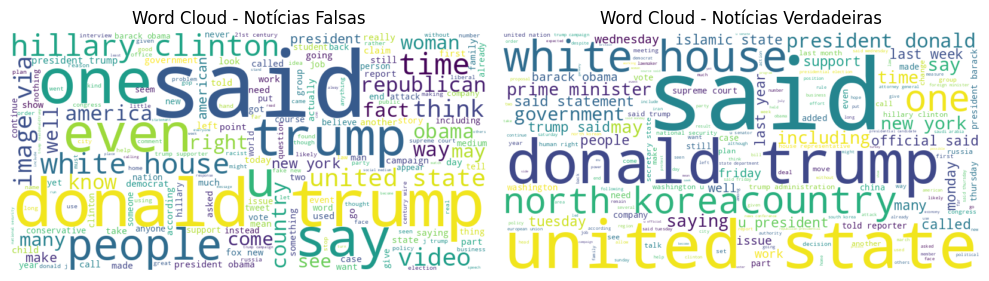

In [2]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

def create_wordcloud_by_label(dados):

  # Separar notícias
  fake_news = dados[dados['label'] == 0]['full_text_clean'].astype(str).tolist()
  true_news = dados[dados['label'] == 1]['full_text_clean'].astype(str).tolist()

  # Criar Word Cloud para notícias verdadeiras
  texto_fake_news = ' '.join(fake_news)
  wordcloud_fake = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(texto_fake_news)

  # Criar Word Cloud para notícias falsas
  texto_true_news = ' '.join(true_news)
  wordcloud_true = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(texto_true_news)

  # Exibir as Word Clouds
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, gráfico 1
  plt.imshow(wordcloud_fake, interpolation='bilinear')
  plt.axis('off')
  plt.title('Word Cloud - Notícias Falsas')

  plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, gráfico 2
  plt.imshow(wordcloud_true, interpolation='bilinear')
  plt.axis('off')
  plt.title('Word Cloud - Notícias Verdadeiras')

  plt.tight_layout()  # Ajustar o layout para evitar sobreposição
  plt.show()

# Geração do Word Cloud usando o dataset processado:
processed_df = pd.read_csv(os.path.join(BASE_DIR, "data", "processed", "processed_dataset.csv"))
create_wordcloud_by_label(processed_df)

### Frequência dos Top-20 Termos por Classe (com CountVectorizer)

c:\Users\joseg\OneDrive\Documentos\PythonProjects\fake-news-classifier\src\plot.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=freq_df, x='count', y='word', palette='viridis')


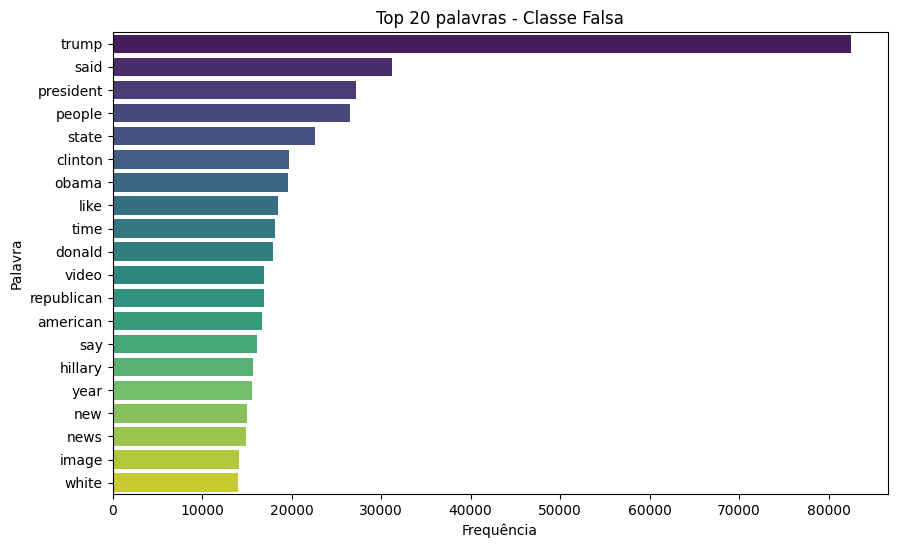

c:\Users\joseg\OneDrive\Documentos\PythonProjects\fake-news-classifier\src\plot.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=freq_df, x='count', y='word', palette='viridis')


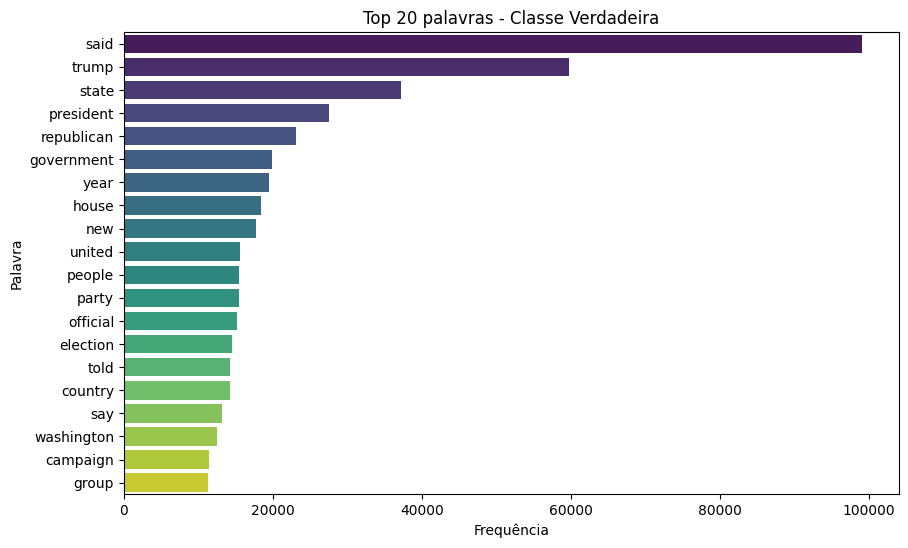

In [3]:
from src.plot import plot_top_words_by_class

# Frequência dos Top-20 Termos por Classe (com CountVectorizer)
plot_top_words_by_class(processed_df, text_col='full_text_clean', label_col='label', label_value=0)
plot_top_words_by_class(processed_df, text_col='full_text_clean', label_col='label', label_value=1)

### Observações Gerais

A análise dos gráficos revela diferenças e semelhanças importantes no vocabulário predominante entre notícias falsas e verdadeiras. Ambos os conjuntos apresentam termos relacionados a política, personalidades públicas e temas institucionais, mas a frequência e o contexto de uso desses termos variam entre as classes.

### Principais Insights

- **Termos em Comum:** Palavras como "trump", "said", "president", "people", "state", "republican", "year", "new" e "say" aparecem entre as mais frequentes em ambas as classes. Isso indica que o tema político é central no dataset, independentemente da veracidade da notícia.
- **Diferenças de Frequência:** Em notícias falsas, "trump" é a palavra mais frequente, seguida de nomes de outras figuras políticas como "clinton", "obama", "donald" e "hillary". Já em notícias verdadeiras, "said" lidera, seguida por "trump", "state" e "president", sugerindo uma ênfase maior em reportar declarações e fatos.
- **Vocabulário Sensacionalista:** Notícias falsas apresentam termos como "video", "image", "like", "time" e "american", que podem indicar apelo a elementos visuais, viralização e generalizações, características comuns em fake news.
- **Vocabulário Institucional:** Notícias verdadeiras destacam palavras como "government", "official", "party", "election", "campaign" e "group", reforçando o foco em informações oficiais e cobertura factual de eventos.

### Padrões Esperados

- **Notícias Falsas:** Espera-se encontrar maior incidência de nomes próprios, termos polêmicos e palavras associadas a viralização e opinião, refletindo estratégias de engajamento e desinformação.
- **Notícias Verdadeiras:** O padrão é de maior presença de termos institucionais, verbos de fala ("said", "told", "say") e palavras relacionadas a processos políticos, indicando uma abordagem mais jornalística e informativa.

### Conclusões

- O vocabulário das notícias falsas tende a ser mais centrado em figuras públicas e termos de fácil viralização, enquanto as notícias verdadeiras priorizam a transmissão de informações oficiais e declarações.
- A sobreposição de termos políticos em ambas as classes reforça a necessidade de considerar não apenas a frequência, mas também o contexto e a combinação de palavras (n-grams) para uma classificação mais precisa.
- Essas diferenças e padrões podem ser explorados para aprimorar modelos de detecção automática de fake news, utilizando estratégias de seleção de features baseadas em frequência e contexto linguístico.

### Geração de bi-grams mais frequentes para cada classe (com CountVectorizer)

c:\Users\joseg\OneDrive\Documentos\PythonProjects\fake-news-classifier\src\plot.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=freq_df, x='count', y='ngram', palette='rocket')


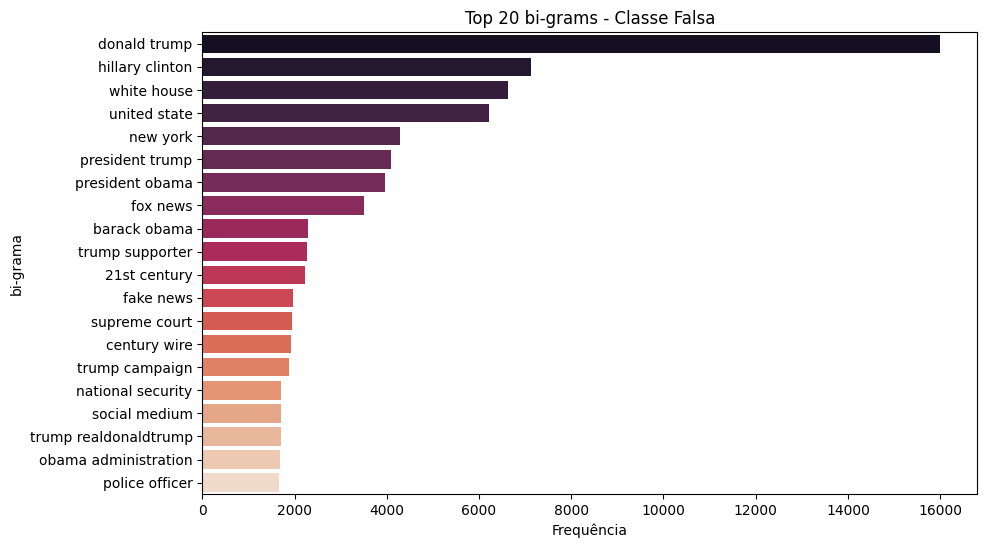

c:\Users\joseg\OneDrive\Documentos\PythonProjects\fake-news-classifier\src\plot.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=freq_df, x='count', y='ngram', palette='rocket')


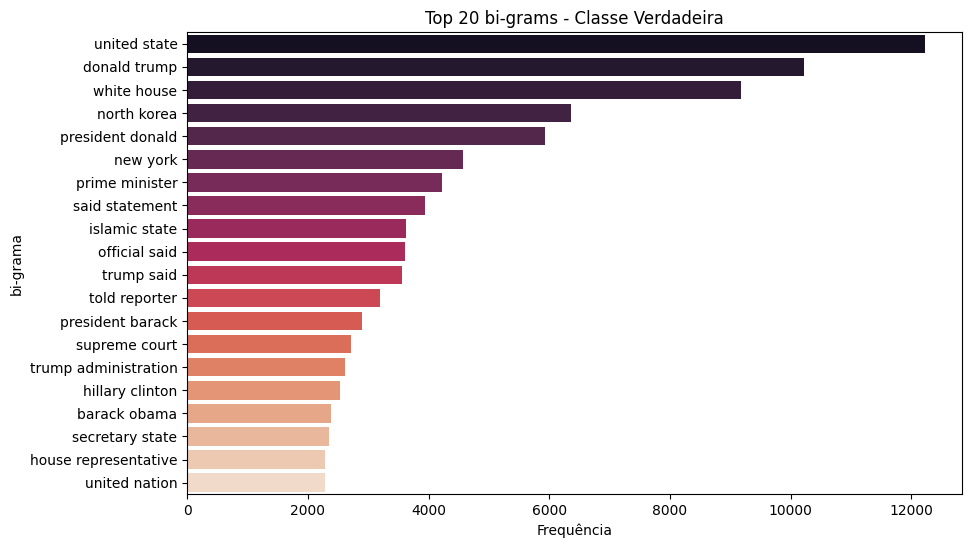

In [4]:
from src.plot import plot_top_bigrams_by_class

# Geração de bi-grams mais frequentes para cada classe
plot_top_bigrams_by_class(processed_df, 'full_text_clean', 'label', 0)
plot_top_bigrams_by_class(processed_df, 'full_text_clean', 'label', 1)

### Observações Gerais

A análise dos bi-grams mais frequentes em notícias falsas e verdadeiras revela padrões distintos de combinação de palavras, refletindo diferenças no foco, estilo e abordagem das duas classes. Ambos os conjuntos apresentam bi-grams relacionados a política, figuras públicas e instituições, mas a frequência e o contexto de uso variam.

### Principais Insights

- **Termos em Comum:** Bi-grams como "donald trump", "white house", "united state", "new york", "president trump", "supreme court" e "barack obama" aparecem em ambas as classes, indicando que temas políticos e governamentais são centrais no dataset.
- **Notícias Falsas:** Destacam-se bi-grams como "hillary clinton", "fox news", "trump supporter", "fake news", "century wire", "trump campaign", "social medium" e "police officer". Muitos desses termos remetem a temas polêmicos, veículos de mídia, campanhas políticas e tópicos frequentemente associados à desinformação e viralização.
- **Notícias Verdadeiras:** Bi-grams como "north korea", "prime minister", "said statement", "official said", "told reporter", "president barack", "secretary state", "house representative" e "united nation" são mais comuns. Isso sugere uma abordagem mais institucional, com foco em declarações oficiais, cargos públicos e cobertura factual de eventos internacionais.

### Padrões Esperados

- **Notícias Falsas:** Espera-se maior presença de bi-grams envolvendo nomes de figuras públicas, veículos de mídia, termos sensacionalistas e expressões associadas a opinião ou viralização ("fake news", "fox news", "trump supporter").
- **Notícias Verdadeiras:** O padrão é de bi-grams que remetem a cargos, instituições, declarações oficiais e eventos internacionais, refletindo uma cobertura mais jornalística e informativa ("official said", "prime minister", "united nation").

### Conclusões

- Os bi-grams mais frequentes em notícias falsas tendem a reforçar narrativas polêmicas, envolver nomes de figuras públicas e veículos de mídia, e utilizar termos que facilitam a viralização.
- Em notícias verdadeiras, os bi-grams refletem uma preocupação maior com a precisão, institucionalidade e relato de fatos, com destaque para cargos, países e declarações oficiais.
- A análise dos bi-grams é fundamental para capturar relações contextuais entre palavras, podendo ser explorada como feature relevante em modelos de detecção automática de fake news.
- A sobreposição de alguns bi-grams políticos em ambas as classes reforça a importância de considerar não apenas a frequência, mas também o contexto e a combinação de palavras para uma classificação mais precisa.

### Termos mais importantes para o vetor TF-IDF

c:\Users\joseg\OneDrive\Documentos\PythonProjects\fake-news-classifier\src\plot.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tfidf_df, x='mean_tfidf', y='term', palette='mako')


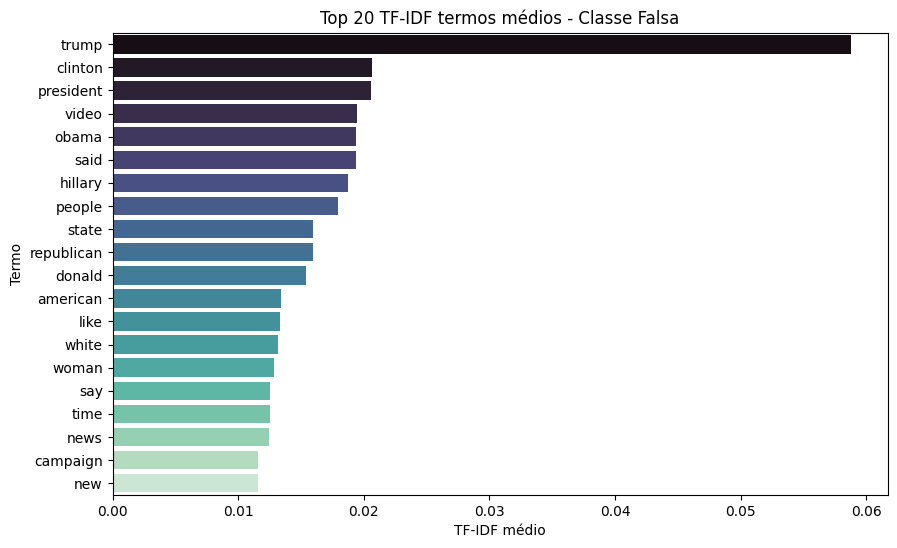

c:\Users\joseg\OneDrive\Documentos\PythonProjects\fake-news-classifier\src\plot.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tfidf_df, x='mean_tfidf', y='term', palette='mako')


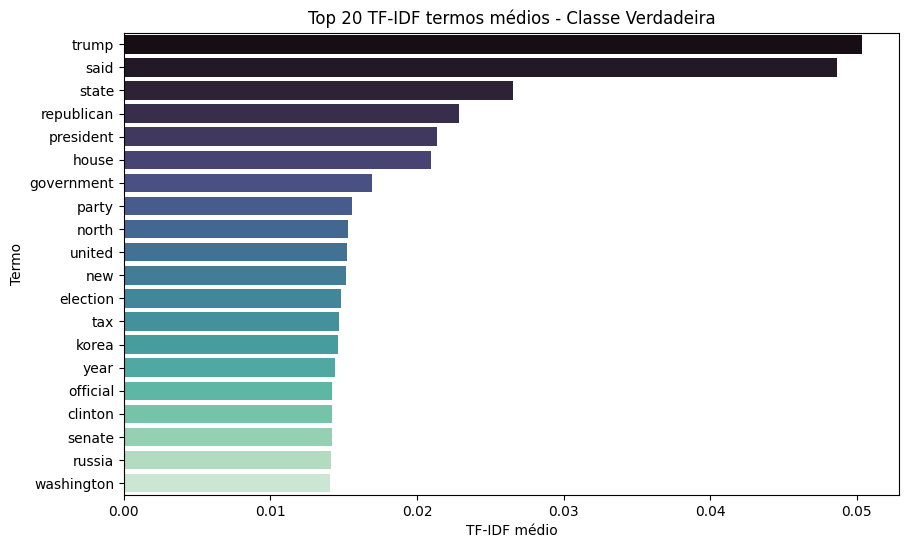

In [5]:
from src.plot import get_top_tfidf_terms_by_class

# Termos mais importantes para o vetor TF-IDF
get_top_tfidf_terms_by_class(processed_df, 'full_text_clean', 'label', 0)
get_top_tfidf_terms_by_class(processed_df, 'full_text_clean', 'label', 1)

### Análise de Sentimentos por Classe (usando TextBlob)

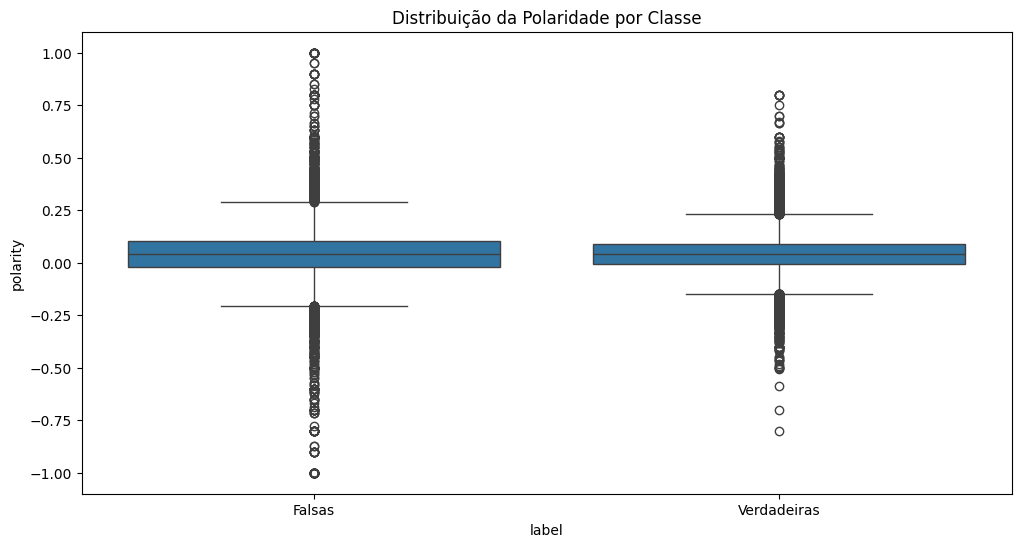

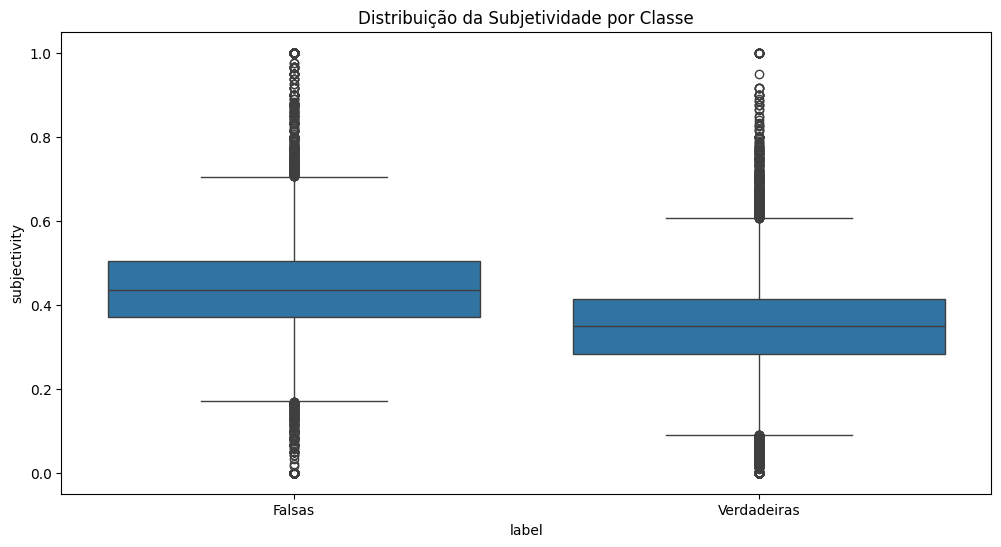

In [6]:
from src.plot import sentiment_analysis

# Análise de Sentimentos por Classe
sentiment_analysis(processed_df)

### Observações Gerais

Os gráficos boxplot apresentam a distribuição dos valores de subjetividade e polaridade para as classes de notícias falsas e verdadeiras. Essas métricas, extraídas por análise de sentimentos, ajudam a entender o perfil linguístico e emocional dos textos em cada categoria.

### Principais Insights

- **Subjetividade:**
  - Notícias falsas tendem a apresentar valores de subjetividade ligeiramente mais altos e uma dispersão maior, indicando que frequentemente utilizam linguagem mais opinativa, emocional ou baseada em julgamentos pessoais.
  - Notícias verdadeiras, por outro lado, mostram uma distribuição de subjetividade mais concentrada em valores médios e baixos, sugerindo um texto mais objetivo e factual.
- **Polaridade:**
  - Ambas as classes apresentam polaridade média próxima de zero, indicando predominância de textos neutros, mas as notícias falsas mostram uma leve tendência a maior dispersão, com mais exemplos de textos fortemente positivos ou negativos.
  - Notícias verdadeiras mantêm uma distribuição mais centralizada, com menos outliers extremos, o que reforça o caráter informativo e menos emocional desse tipo de conteúdo.

### Padrões Esperados

- **Notícias Falsas:** Espera-se maior subjetividade, pois textos de fake news frequentemente apelam para emoções, opiniões e julgamentos para engajar o leitor e influenciar percepções.
- **Notícias Verdadeiras:** O padrão é de menor subjetividade e polaridade mais neutra, refletindo o compromisso jornalístico com a objetividade, imparcialidade e relato de fatos.
- **Polaridade:** Embora ambas as classes sejam predominantemente neutras, notícias falsas podem apresentar mais casos extremos de positividade ou negatividade, devido ao uso de linguagem sensacionalista.

### Conclusões

- A análise de subjetividade e polaridade reforça que notícias falsas tendem a ser mais opinativas e emocionalmente carregadas, enquanto notícias verdadeiras são mais objetivas e neutras.
- Essas diferenças podem ser exploradas como features relevantes em modelos de detecção automática de fake news, auxiliando na distinção entre conteúdo informativo e manipulativo.
- O uso combinado dessas métricas com outras características linguísticas pode aumentar a robustez e a interpretabilidade dos modelos de classificação.

# **Vetorização e definição dos dados de treino e teste do dataset**

In [7]:
from sklearn.model_selection import train_test_split
from src.vectorizer import create_vectorizer

# Define as características (X) e o alvo (Y)
X = processed_df['full_text_clean']
Y = processed_df['label']

# Separa os dados de treino e teste (80% treino, 20% teste)
X_train_text, X_test_text, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Cria o vetor TF-IDF
vectorizer = create_vectorizer()
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

# **Treinamento e avaliação do modelo Logistic Regression (LR)**

Logistic Regression
Acurácia: 0.9803
Relatório de Classificação:
              precision    recall  f1-score   support

   Fake News       0.99      0.98      0.98      4695
   Real News       0.97      0.99      0.98      4283

    accuracy                           0.98      8978
   macro avg       0.98      0.98      0.98      8978
weighted avg       0.98      0.98      0.98      8978

Matriz de Confusão:


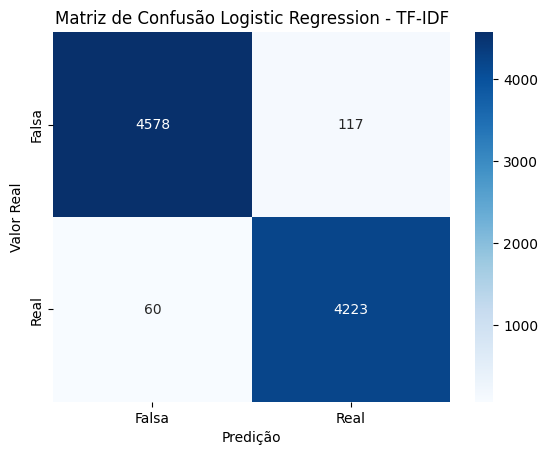

In [8]:
from src.classifiers.logistic_regression import train_logistic_regression


# Treina e avalia o modelo Logistic Regression (LR)
cm = train_logistic_regression(X_train, Y_train, X_test, Y_test)

# Crie o heatmap da matriz de confusão
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Falsa', 'Real'], yticklabels=['Falsa', 'Real'])
plt.xlabel('Predição')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão Logistic Regression - TF-IDF')
plt.show()

## Palavras mais indicativas do modelo LR
- Aqui vamos extrair os coeficientes do modelo, que indicam a força e direção do impacto dos termos na classificação.

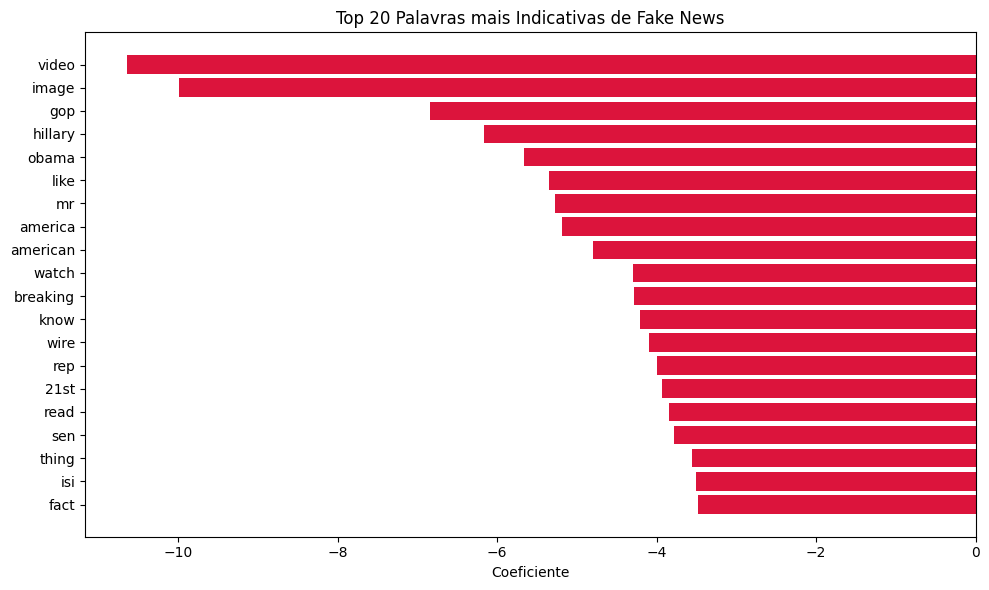

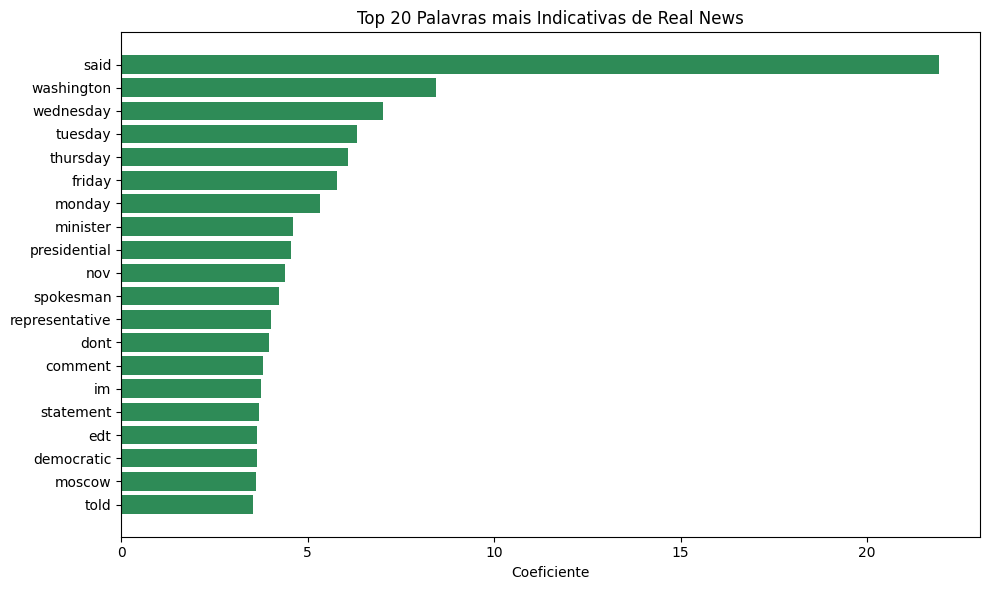

In [14]:


vectorizer = create_vectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train_text)  # Certifique-se de usar o mesmo texto aqui
X_test_tfidf = vectorizer.transform(X_test_text)

# Treina o modelo novamente (caso ainda não tenha)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, Y_train)

# Obtém os coeficientes e os termos
feature_names = vectorizer.get_feature_names_out()
coefs = model.coef_[0]

# Cria DataFrame dos termos e coeficientes
coef_df = pd.DataFrame({'term': feature_names, 'coef': coefs})

# 20 termos mais indicativos para Fake News (coeficiente negativo mais baixo)
top_fake = coef_df.sort_values(by='coef').head(20)

# 20 termos mais indicativos para Real News (coeficiente positivo mais alto)
top_real = coef_df.sort_values(by='coef', ascending=False).head(20)

# Plot Fake
plt.figure(figsize=(10, 6))
plt.barh(top_fake['term'], top_fake['coef'], color='crimson')
plt.title('Top 20 Palavras mais Indicativas de Fake News')
plt.xlabel('Coeficiente')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Plot Real
plt.figure(figsize=(10, 6))
plt.barh(top_real['term'], top_real['coef'], color='seagreen')
plt.title('Top 20 Palavras mais Indicativas de Real News')
plt.xlabel('Coeficiente')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# **Treinamento e avaliação do modelo Random Forest (RF)**

Random Forest
Acurácia: 0.9779
Relatório de Classificação:
              precision    recall  f1-score   support

   Fake News       0.98      0.98      0.98      4695
   Real News       0.98      0.98      0.98      4283

    accuracy                           0.98      8978
   macro avg       0.98      0.98      0.98      8978
weighted avg       0.98      0.98      0.98      8978

Matriz de Confusão:


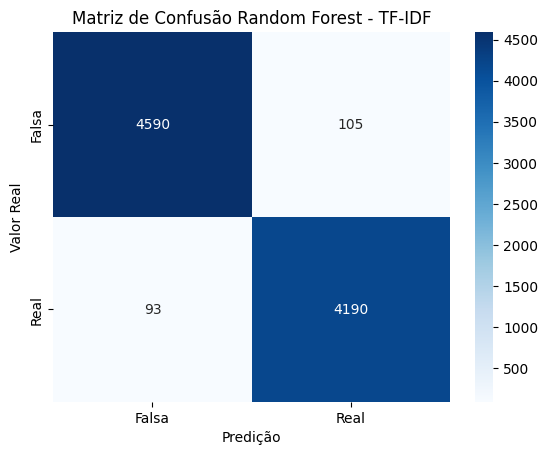

In [9]:
from src.classifiers.random_forest import train_random_forest

# Treina e avalia o modelo Random Forest (RF)
cm = train_random_forest(X_train, Y_train, X_test, Y_test)

# Crie o heatmap da matriz de confusão
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Falsa', 'Real'], yticklabels=['Falsa', 'Real'])
plt.xlabel('Predição')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão Random Forest - TF-IDF')
plt.show()

# **Treinamento e avaliação do modelo Naive Bayes (NB)**

Naive Bayes
Acurácia: 0.9393
Relatório de Classificação:
              precision    recall  f1-score   support

   Fake News       0.95      0.94      0.94      4695
   Real News       0.93      0.94      0.94      4283

    accuracy                           0.94      8978
   macro avg       0.94      0.94      0.94      8978
weighted avg       0.94      0.94      0.94      8978

Matriz de Confusão:


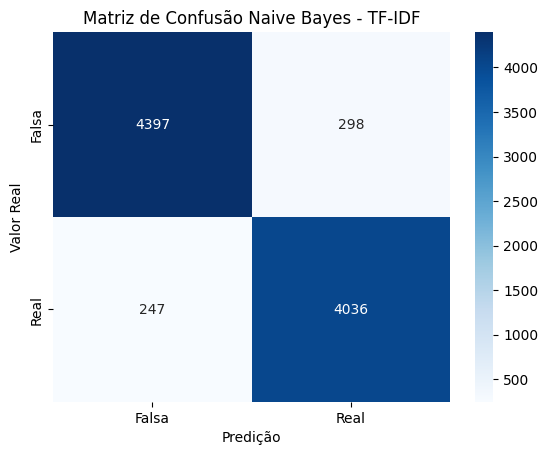

In [10]:
from src.classifiers.naive_bayes import train_naive_bayes

# Treina e avalia o modelo Naive Bayes (NB)
cm = train_naive_bayes(X_train, Y_train, X_test, Y_test)

# Crie o heatmap da matriz de confusão
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Falsa', 'Real'], yticklabels=['Falsa', 'Real'])
plt.xlabel('Predição')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão Naive Bayes - TF-IDF')
plt.show()

# **Treinamento e avaliação do modelo Support Vector Machines (SVM)**

Support Vector Machines (SVM)
Acurácia: 0.9904
Relatório de Classificação:
              precision    recall  f1-score   support

   Fake News       0.99      0.99      0.99      4695
   Real News       0.99      0.99      0.99      4283

    accuracy                           0.99      8978
   macro avg       0.99      0.99      0.99      8978
weighted avg       0.99      0.99      0.99      8978

Matriz de Confusão:


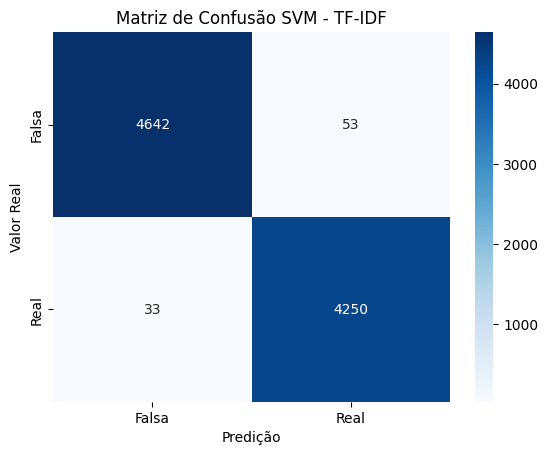

In [11]:
from src.classifiers.svm import train_svm

# Treina e avalia o modelo Support Vector Machines (SVM)
cm = train_svm(X_train, Y_train, X_test, Y_test)

# Crie o heatmap da matriz de confusão
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Falsa', 'Real'], yticklabels=['Falsa', 'Real'])
plt.xlabel('Predição')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão SVM - TF-IDF')
plt.show()

# **Aplicando validação cruzada (cross validation) para avaliar robustez do modelo e reduzir overfitting**

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

# Vetorização (ajuste apenas uma vez com todo o X)
X_vectorized = vectorizer.fit_transform(X)
Y = processed_df['label']

# Modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "SVM (LinearSVC)": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Avaliação com cross-validation
from sklearn.metrics import make_scorer, f1_score
scorer = make_scorer(f1_score, average='weighted')

for name, model in models.items():
    scores = cross_val_score(model, X_vectorized, Y, cv=5, scoring=scorer)
    print(f"{name}:")
    print(f"  F1-Score médio: {scores.mean():.4f}")
    print(f"  F1-Score desvio padrão: {scores.std():.4f}\n")


Logistic Regression:
  F1-Score médio: 0.9652
  F1-Score desvio padrão: 0.0066

Naive Bayes:
  F1-Score médio: 0.8962
  F1-Score desvio padrão: 0.0263

SVM (LinearSVC):
  F1-Score médio: 0.9798
  F1-Score desvio padrão: 0.0032

Random Forest:
  F1-Score médio: 0.9622
  F1-Score desvio padrão: 0.0079

